In [31]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/an-2-an/data/master/gas.csv")
df.head()

,date,mark,volume,price,station
0,1.1.2019,92,36,28.75,1
1,8.1.2019,95,66,30.50,2
2,15.1.2019,95,82,30.50,3
3,22.1.2019,95,14,30.50,1
4,29.1.2019,95,47,30.50,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     26 non-null     object 
 1   mark     26 non-null     int64  
 2   volume   26 non-null     int64  
 3   price    26 non-null     float64
 4   station  26 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [34]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     26 non-null     datetime64[ns]
 1   mark     26 non-null     int64         
 2   volume   26 non-null     int64         
 3   price    26 non-null     float64       
 4   station  26 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.1 KB


In [38]:
df['money'] = df['volume'] * df['price']
df['month'] = pd.DatetimeIndex(df['date']).month
df.tail()

,date,mark,volume,price,station,money,month
21,2019-05-28,95,96,30.50,2,2928.0,5
22,2019-06-04,92,22,28.75,3,632.5,6
23,2019-06-11,95,85,30.50,3,2592.5,6
24,2019-06-18,92,22,28.75,1,632.5,6
25,2019-06-25,92,66,28.75,1,1897.5,6


<AxesSubplot:xlabel='date'>

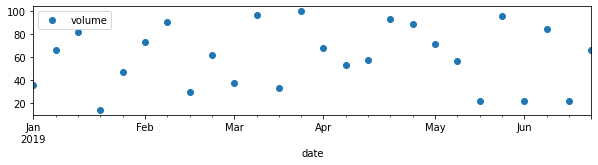

In [46]:
df.plot(x='date', y='volume', figsize=(10,2), style='o')

<AxesSubplot:xlabel='station'>

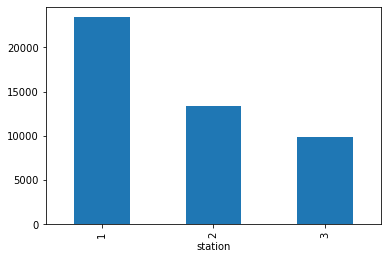

In [48]:
df.groupby('station')['money'].sum().plot.bar()

In [49]:
df_95 = df[ df['mark'] == 95 ]
df_95.head()

,date,mark,volume,price,station,money,month
1,2019-01-08,95,66,30.5,2,2013.0,1
2,2019-01-15,95,82,30.5,3,2501.0,1
3,2019-01-22,95,14,30.5,1,427.0,1
4,2019-01-29,95,47,30.5,1,1433.5,1
6,2019-02-12,95,91,30.5,1,2775.5,2


<AxesSubplot:xlabel='date'>

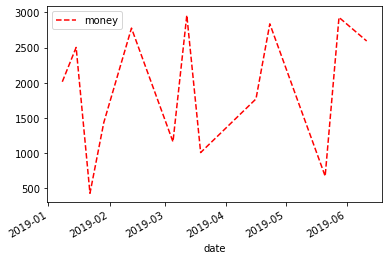

In [51]:
df_95.plot(x='date',y='money', style='--', color='red')

<AxesSubplot:xlabel='date'>

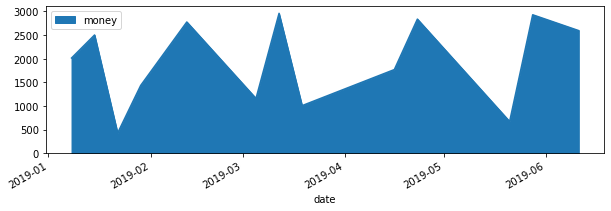

In [52]:
df_95.plot.area(x='date',y='money', figsize=(10,3))

<AxesSubplot:xlabel='date'>

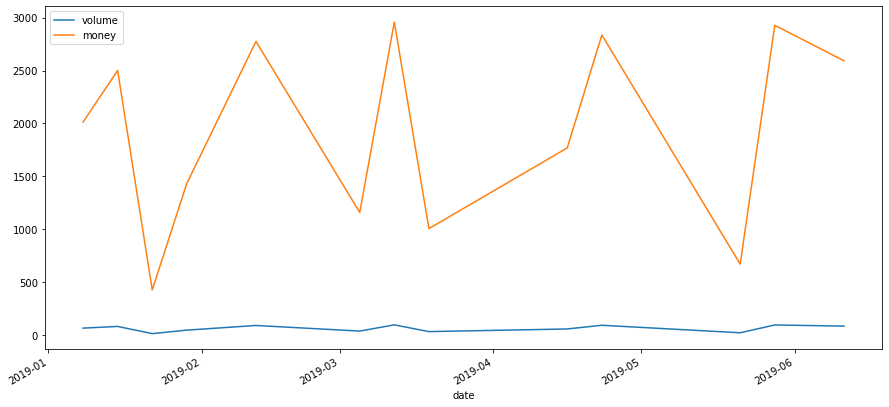

In [56]:
df_95.plot(x='date', y=['volume', 'money'],figsize=(15,7))

<AxesSubplot:xlabel='month'>

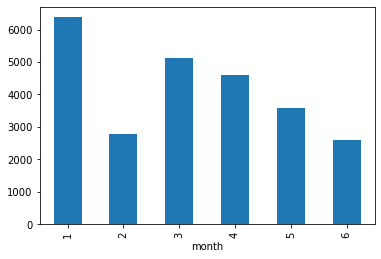

In [57]:
df_95.groupby('month')['money'].sum().plot.bar()

<AxesSubplot:ylabel='money'>

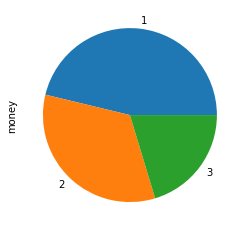

In [58]:
df_95.groupby('station')['money'].sum().plot.pie()

array([<AxesSubplot:ylabel='volume'>, <AxesSubplot:ylabel='money'>],
      dtype=object)

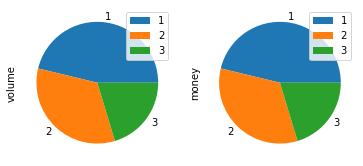

In [62]:
df_95.groupby('station')[['volume','money']].sum().plot.pie(subplots=True)

<AxesSubplot:>

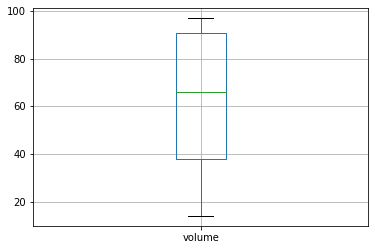

In [63]:
df_95.boxplot(column='volume')

<AxesSubplot:title={'center':'money'}, xlabel='station'>

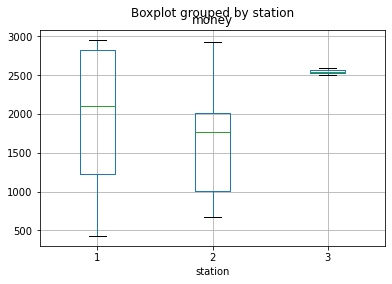

In [64]:
df_95.boxplot(column='money', by='station')

<AxesSubplot:ylabel='Density'>

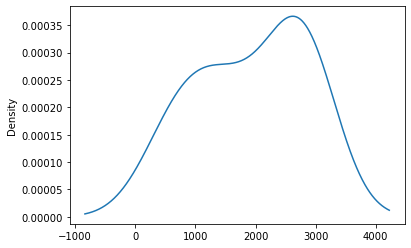

In [65]:
df_95['money'].plot.kde()

<AxesSubplot:>

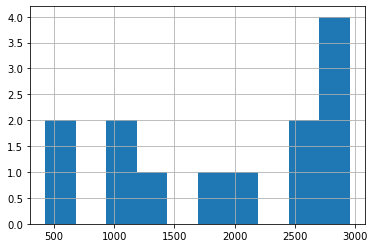

In [66]:
df_95['money'].hist()